In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('bengaluru_house_prices.csv')

In [ ]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
df.area_type.value_counts()

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


In [ ]:
df=df.drop(['area_type','availability','society','balcony'],axis='columns')

In [ ]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [ ]:
df.isna().any()

,0
location,True
size,True
total_sqft,False
bath,True
price,False


In [ ]:
df.isna().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
df.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
df_new=df.dropna()

In [ ]:
df_new

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [ ]:
df_new['size'].str[0]

,size
0,2
1,4
2,3
3,3
4,2
...,...
13315,5
13316,4
13317,2
13318,4


In [ ]:
df_new['BHK']=df_new['size'].apply(lambda x: int(x.split(' ')[0]))#df_new['size'].str[0]

<ipython-input-15-d6eb52d20106>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['BHK']=df_new['size'].apply(lambda x: int(x.split(' ')[0]))#df_new['size'].str[0]


In [ ]:
df_new=df_new.drop('size',axis='columns')

In [ ]:
df_new

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [ ]:
df_new.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
df_new.total_sqft.value_counts()

,count
total_sqft,
1200,843
1100,221
1500,204
2400,195
600,180
...,...
5985,1
3580,1
2461,1


In [ ]:
def covert_flot(x):
  try:
    float(x)
  except:
    return False
  return True


In [ ]:
df_new[~df_new['total_sqft'].apply(covert_flot)]

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [ ]:
def total_sqft_convert(x):
  lists=x.split('-')
  if len(lists)==2:
    return (float(lists[0]) + float(lists[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
print(total_sqft_convert('5555'))

5555.0


In [ ]:
df4=df_new.copy()

In [ ]:
df4['total_sqft']=df4.total_sqft.apply(total_sqft_convert)

In [ ]:
df4.loc[30]

,30
location,Yelahanka
total_sqft,2475.0
bath,4.0
price,186.0
BHK,4


In [ ]:
df5=df4

In [ ]:
df5

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [ ]:
#Outlier

In [ ]:
df5['price_per_sqft']=df5['price']*1000000/df5['total_sqft']

In [ ]:
df5

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,1200.0,2.0,51.00,2,42500.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,66898.349262
13316,Richards Town,3600.0,5.0,400.00,4,111111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,52585.451358
13318,Padmanabhanagar,4689.0,4.0,488.00,4,104073.363190


In [ ]:
df5.location=df5.location.apply(lambda x: x.strip())
locations_= df.groupby('location')['location'].agg('count').sort_values(ascending=False)
locations_

,location
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Banaswadi,1
Kanakadasa Layout,1
Kanakapur main road,1


In [ ]:
other_locations=locations_[locations_<=10]

In [ ]:
other_locations

,location
location,
Naganathapura,10
Nagadevanahalli,10
Dodsworth Layout,10
Dairy Circle,10
Nagappa Reddy Layout,10
...,...
Banaswadi,1
Kanakadasa Layout,1
Kanakapur main road,1


In [ ]:
df5.location=df5.location.apply(lambda x: 'other' if x in other_locations else x)

In [ ]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'Kaval Byrasandra',
       'ISRO Layout', 'Garudachar Palya', 'EPIP Zone', 'Dasanapura',
       'Kasavanhalli', 'Sanjay nagar', 'Mysore Highway', 'Domlur',
       'Sarjapura - Attibel

<h1>Removing Outlier

In [ ]:
df5[df5.total_sqft/df5.BHK<300]

,location,total_sqft,bath,price,BHK,price_per_sqft
9,other,1020.0,6.0,370.0,6,362745.098039
45,HSR Layout,600.0,9.0,200.0,8,333333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,106609.808102
68,other,1350.0,7.0,85.0,8,62962.962963
70,other,500.0,3.0,100.0,3,200000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,155714.285714
13279,other,1200.0,5.0,130.0,6,108333.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,90909.090909
13303,Vidyaranyapura,774.0,5.0,70.0,5,90439.276486


In [ ]:
df6=df5[~(df5.total_sqft/df5.BHK<300)]

In [ ]:
df6.shape

(12502, 6)

In [ ]:
df6.price_per_sqft.describe()

,price_per_sqft
count,1.245600e+04
mean,6.308503e+04
std,4.168127e+04
min,2.678298e+03
25%,4.210526e+04
50%,5.294118e+04
75%,6.916667e+04
max,1.764706e+06


In [ ]:
def remove_pps_outlier(df):
  df_out=pd.DataFrame()
  for key,sub_df in df.groupby('location'):
    m=np.mean(sub_df.price_per_sqft)
    mstd_=np.std(sub_df.price_per_sqft)
    reduced= sub_df[(sub_df.price_per_sqft>(m-mstd_)) & (sub_df.price_per_sqft<=(m+mstd_))]
    df_out=pd.concat([df_out,reduced],ignore_index=True)
  return df_out
    # print(m,mstd_)

In [ ]:
df7=remove_pps_outlier(df6)

In [ ]:
df7

,location,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,150175.438596
1,1st Block Jayanagar,1630.0,3.0,194.00,3,119018.404908
2,1st Block Jayanagar,1875.0,2.0,235.00,3,125333.333333
3,1st Block Jayanagar,1200.0,2.0,130.00,3,108333.333333
4,1st Block Jayanagar,1235.0,2.0,148.00,2,119838.056680
...,...,...,...,...,...,...
10204,other,812.0,1.0,26.00,1,32019.704433
10205,other,1440.0,2.0,63.93,3,44395.833333
10206,other,1075.0,2.0,48.00,2,44651.162791
10207,other,3600.0,5.0,400.00,4,111111.111111


In [ ]:
df7.price_per_sqft.describe()

,price_per_sqft
count,10209.000000
mean,56599.166686
std,22738.673315
min,12500.000000
25%,42419.354839
50%,51751.592357
75%,64257.028112
max,245098.039216


In [ ]:
df7.shape

(10209, 6)

In [ ]:
def show_scatter(df,location):
  bhk2=df[(df.location==location) & (df.BHK==2)]
  bhk3=df[(df.location==location) & (df.BHK==3)]
  plt.figure(figsize=(16,8))
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK')
  plt.scatter(bhk3.total_sqft,bhk3.price,color='red',marker='*',label='3 BHK')
  plt.xlabel('Total SQFT')
  plt.ylabel('Price per sqft')
  plt.legend(loc='upper right')


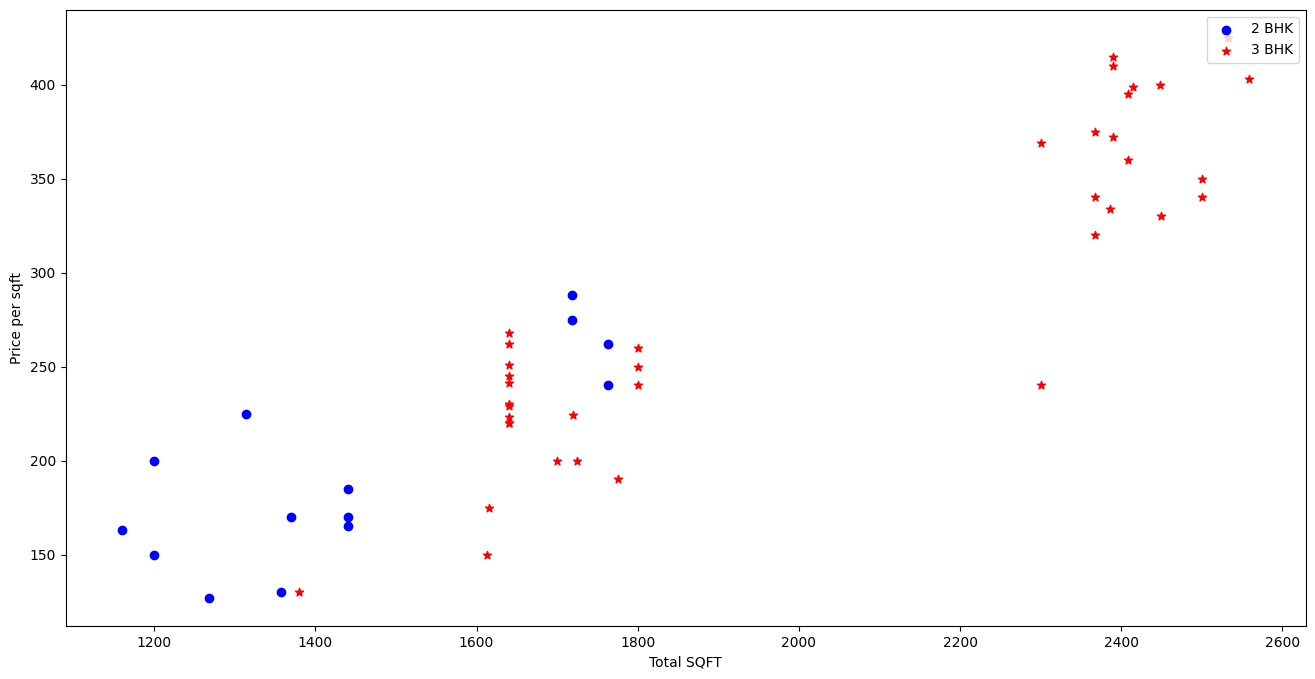

In [ ]:
show_scatter(df7,'Rajaji Nagar')

In [ ]:
#here some of the 2bhk with same sqft price is more than 3bhk

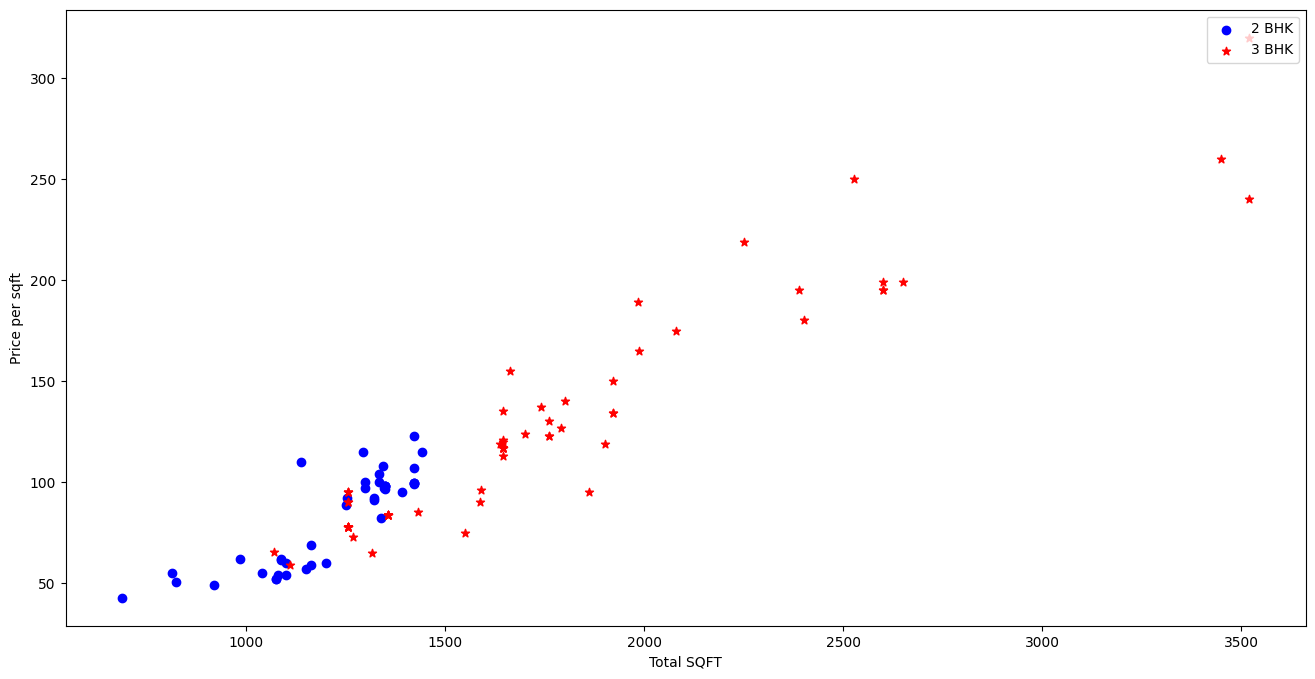

In [ ]:
show_scatter(df7,'Hebbal')

In [ ]:
def remove_bhk_outlier(df):
  exculde=np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('BHK'):
      bhk_stats[bhk]={
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('BHK'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exculde=np.append(exculde,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exculde,axis='index')



In [ ]:
df7.shape

(10209, 6)

In [ ]:
df8=remove_bhk_outlier(df7)

In [ ]:
df8.shape

(7313, 6)

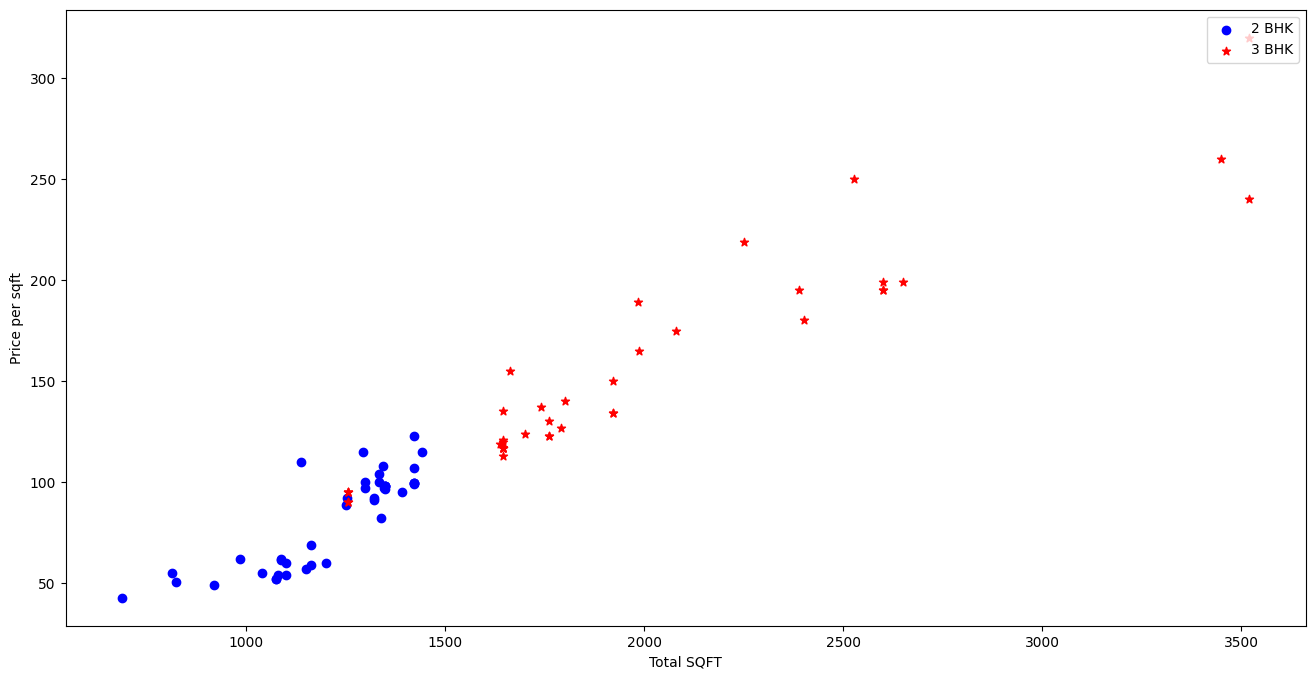

In [ ]:
show_scatter(df8,'Hebbal')

In [ ]:
import seaborn as sns

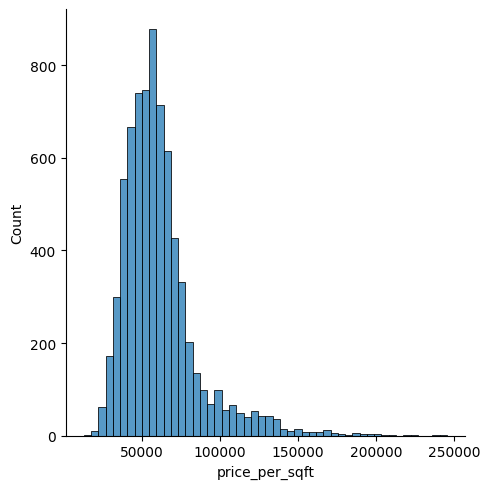

In [ ]:
sns.displot(df8['price_per_sqft'],
            bins=50,
            )
plt.show()

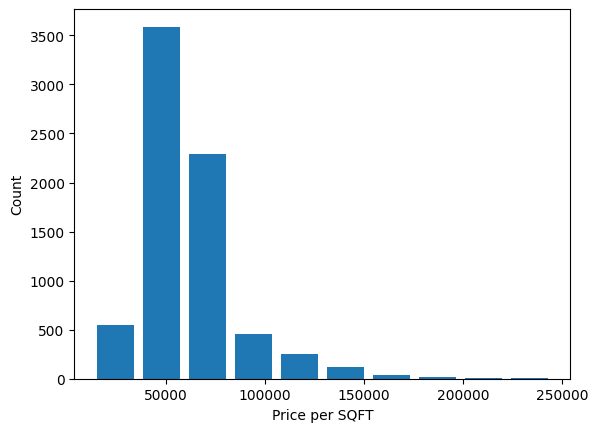

In [ ]:
plt.hist(df8['price_per_sqft'],rwidth=0.8)
plt.xlabel('Price per SQFT')
plt.ylabel('Count')
plt.show()

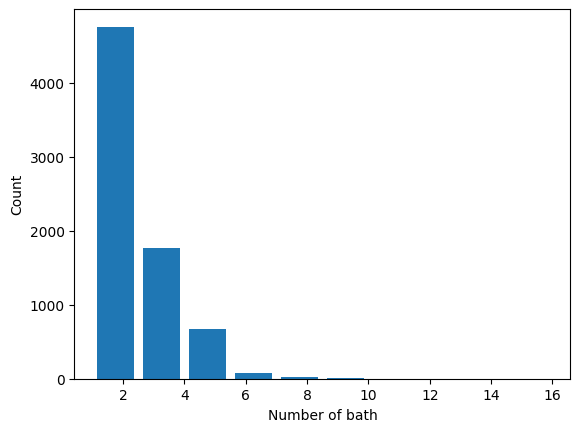

In [ ]:
plt.hist(df8['bath'],rwidth=0.8)
plt.xlabel('Number of bath')
plt.ylabel('Count')
plt.show()

In [60]:
df8[(df8.bath>(df8.BHK+2))]

,location,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,32520.325203
5236,Nagasandra,7000.0,8.0,450.0,4,64285.714286
6719,Thanisandra,1806.0,6.0,116.0,3,64230.343300
8415,other,11338.0,9.0,1000.0,6,88198.976892


In [74]:
df9=df8[~(df8.bath>(df8.BHK+2))]

In [75]:
df9.shape

(7309, 6)

In [76]:
df10=df9.drop('price_per_sqft',axis='columns')

In [77]:
df10

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10200,other,1800.0,1.0,200.0,1
10203,other,1353.0,2.0,110.0,2
10204,other,812.0,1.0,26.0,1
10207,other,3600.0,5.0,400.0,4


In [78]:
dummies=pd.get_dummies(df10['location'])
dummies=dummies.drop('other',axis='columns')
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10207,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
df11=pd.concat([df10,dummies],axis='columns')

In [83]:
df11

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,other,1800.0,1.0,200.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10203,other,1353.0,2.0,110.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10204,other,812.0,1.0,26.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10207,other,3600.0,5.0,400.0,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [84]:
df12=df11.drop('location',axis='columns')

In [85]:
df12

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,1800.0,1.0,200.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10203,1353.0,2.0,110.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10204,812.0,1.0,26.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10207,3600.0,5.0,400.0,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [86]:
X=df12.drop('price',axis='columns')
y=df12.price

In [87]:
X

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,1800.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10203,1353.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10204,812.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10207,3600.0,5.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
y

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0
...,...
10200,200.0
10203,110.0
10204,26.0
10207,400.0


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
model=LinearRegression()

In [93]:
model.fit(X_train,y_train)

LinearRegression()

In [94]:
model.score(X_test,y_test)

0.8591644922739089

<h1 style='color:red;'>K Fold Cross validation </h1>

In [95]:
from sklearn.model_selection import cross_val_score,ShuffleSplit

In [96]:
cross_val_score(model,X,y)

array([0.46272398, 0.57418685, 0.58537353, 0.51873766, 0.75192024])

In [97]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [98]:
linear_clf_mean=cross_val_score(model,X,y,cv=cv).mean()
linear_clf_mean

0.8265428730987953

Multiple Checking"


In [99]:
from sklearn.model_selection import GridSearchCV

In [111]:
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor


In [124]:
algo={
    'Linear_regrssion':{
        'model':LinearRegression(),
        'param':{
        }
    },
    'Lasso':{
        'model':Lasso(),
        'param':{
            'alpha':[1,2],
            'selection':['random','cyclic']
        }
      },
    'Desicison Tree':{
        'model':DecisionTreeRegressor(),
        'param':{
            'criterion':['mse','friedman_mse'],
            'splitter':['best','random']
        }
      }
}

In [125]:


def find_best_model_using_gridsearchcv(X,y,algos):

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['param'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y,algo)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

,model,best_score,best_params
0,Linear_regrssion,0.826543,{}
1,Lasso,0.672151,"{'alpha': 1, 'selection': 'cyclic'}"
2,Desicison Tree,0.655519,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [134]:
X

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,1800.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10203,1353.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10204,812.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10207,3600.0,5.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [143]:
def predict_price(location,sqft,bath,bhk):
  location_index=np.where(X.columns==location)[0][0]
  # print(np.where(X.columns==location))
  # print(location_index)

  x=np.zeros(len(X.columns))
  # print(x)
  x[0]=sqft
  x[1]=bath
  x[2]=bhk
  if location_index>=0:
    x[location_index]=1
  # print(x)
  return model.predict([x])[0]

In [146]:
predict_price('1st Phase JP Nagar',1000,2,2)#lakhs

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.86718689435747

In [147]:
predict_price('1st Phase JP Nagar',1000,5,5)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.11857966026929

In [148]:
import pickle

In [149]:
with open('real_estate_price_prediction_model.pickle','wb') as f:
  pickle.dump(model,f)

In [150]:
import json

In [151]:
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
  f.write(json.dumps(columns))